In [ ]:
from ultralytics import YOLO

import torch
import matplotlib.pyplot as plt
import numpy as np 
import cv2

In [2]:
# Load model
model = YOLO("./runs/segment/train4/weights/best.pt")

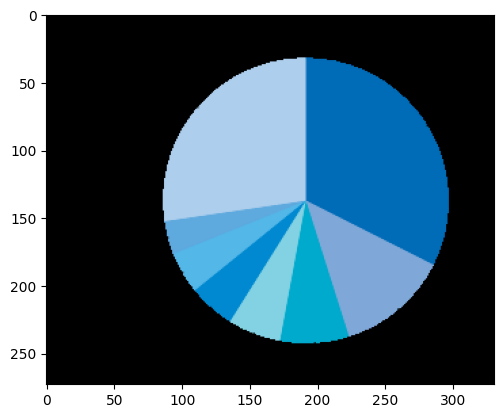

In [3]:
img_path = "../../assets/dataset/test1/piedata(1008)/pie/images/test2019/f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [4]:
# Test model 
results = model(img_path)[0]
results.save("output.png")


image 1/1 /media/vietz/Data5/FPT/2025/SPRING/DPL302m/ASSIGNMENTS_AND_EXAMS/PROJECTS/ChartInsight/model/segmentation/../../assets/dataset/test1/piedata(1008)/pie/images/test2019/f447ffede2ef85e73a191f8c1ed3f9df_c3RhdGxpbmtzLm9lY2Rjb2RlLm9yZwk5Mi4yNDMuMjMuMTM3.XLS-0-0.png: 544x640 8 Seriess, 42.9ms
Speed: 3.2ms preprocess, 42.9ms inference, 105.5ms postprocess per image at shape (1, 3, 544, 640)


'output.png'

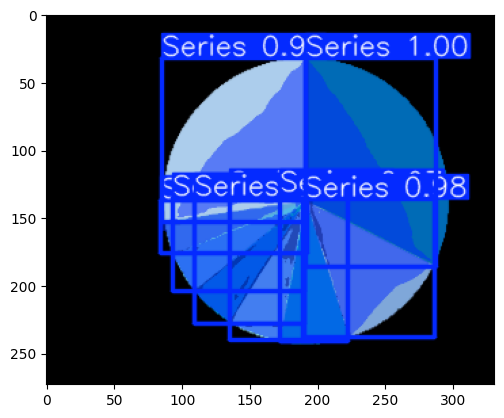

In [5]:
# Display results
res = cv2.imread("output.png")
res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)

plt.imshow(res)

In [31]:
masks = results.masks.data

# Convert masks to numpy
masks = masks.cpu().numpy()
masks

array([[[          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        ...,
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0]],

       [[          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,           0, ...,           0,           0,           0],
        ...,
        [          0,           0,           0, ...,           0,           0,           0],
        [          0,           0,        

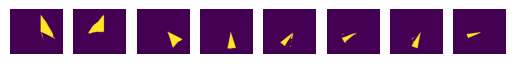

In [33]:
fig, ax = plt.subplots(1, len(masks))
ax = ax.flatten()
for i, mask in enumerate(masks):
    ax[i].imshow(mask)
    ax[i].axis("off")
plt.show()

In [32]:
results.keypoints

In [35]:
results.boxes.xyxy

tensor([[191.1767,  32.4482, 287.5701, 186.1328],
        [ 85.3508,  32.6050, 191.0727, 153.6941],
        [190.6937, 136.9203, 286.2201, 238.6655],
        [172.7054, 132.5515, 222.8802, 241.5980],
        [109.4512, 135.6936, 190.3284, 228.6351],
        [ 93.7043, 135.3713, 190.6634, 204.4996],
        [135.4363, 132.4681, 189.9730, 240.6154],
        [ 84.9424, 137.0340, 192.8547, 176.7800]], device='cuda:0')

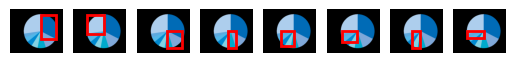

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy tọa độ của bounding boxes
boxes = results.boxes.xyxy.cpu().numpy()  # Chuyển toàn bộ boxes sang numpy



fig, ax = plt.subplots(1, len(boxes))
ax = ax.flatten()

for i, box in enumerate(boxes):
    x1, y1, x2, y2 = box
    ax[i].imshow(img)
    ax[i].add_patch(plt.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color="red", linewidth=2))
    ax[i].axis("off")
    
    
plt.show()

